<a href="https://colab.research.google.com/github/DevThazin/ML_projects/blob/main/Student_mark_predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# **Load Dataset**

In [3]:
df=pd.read_csv("/content/student_info.csv")
df.head()

,study_hours,student_marks
0,6.83,78.50
1,6.56,76.74
2,NaN,78.68
3,5.67,71.82
4,8.67,84.19


In [4]:
df.tail()

,study_hours,student_marks
195,7.53,81.67
196,8.56,84.68
197,8.94,86.75
198,6.60,78.05
199,8.35,83.50


In [5]:
df.shape

(200, 2)

# Getting information about **dataset**

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   study_hours    195 non-null    float64
 1   student_marks  200 non-null    float64
dtypes: float64(2)
memory usage: 3.2 KB


In [8]:
df.describe()

,study_hours,student_marks
count,195.000000,200.00000
mean,6.995949,77.93375
std,1.253060,4.92570
min,5.010000,68.57000
25%,5.775000,73.38500
50%,7.120000,77.71000
75%,8.085000,82.32000
max,8.990000,86.99000


# Plotting the **data**

In [11]:
x=df['study_hours']
y=df['student_marks']
print(x)
print(y)


0      6.83
1      6.56
2       NaN
3      5.67
4      8.67
       ... 
195    7.53
196    8.56
197    8.94
198    6.60
199    8.35
Name: study_hours, Length: 200, dtype: float64
0      78.50
1      76.74
2      78.68
3      71.82
4      84.19
       ...  
195    81.67
196    84.68
197    86.75
198    78.05
199    83.50
Name: student_marks, Length: 200, dtype: float64


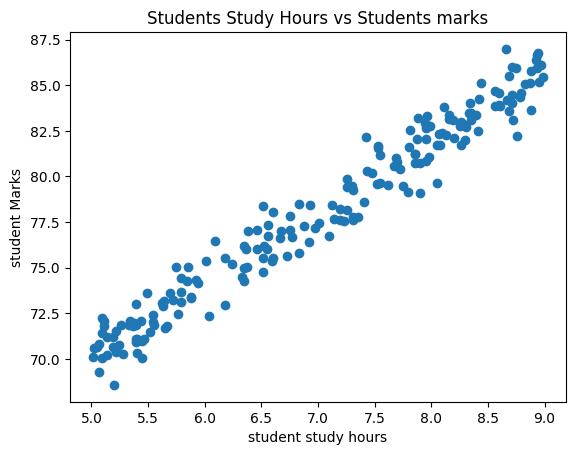

In [15]:
plt.scatter(x,y)
plt.xlabel("student study hours")
plt.ylabel("student Marks")
plt.title("Students Study Hours vs Students marks")
plt.show()

# **Preparing** data

In [17]:
#datacleaning
df.isnull().sum()

study_hours      5
student_marks    0
dtype: int64

In [18]:
df.mean()

study_hours       6.995949
student_marks    77.933750
dtype: float64

In [22]:
mean_study_hours=df['study_hours'].mean()
df['study_hours'].fillna(mean_study_hours , inplace= True)

In [24]:
df.isnull().sum()

study_hours      0
student_marks    0
dtype: int64

In [27]:
#axis=1 == column
X=df.drop('student_marks',axis=1)
X

,study_hours
0,6.830000
1,6.560000
2,6.995949
3,5.670000
4,8.670000
...,...
195,7.530000
196,8.560000
197,8.940000
198,6.600000


In [34]:
Y=df.drop('study_hours',axis=1)
Y

,student_marks
0,78.50
1,76.74
2,78.68
3,71.82
4,84.19
...,...
195,81.67
196,84.68
197,86.75
198,78.05


**Importing train_test_split**

In [35]:
from sklearn.model_selection import train_test_split

In [36]:
X_train, X_test, Y_train, Y_test=train_test_split(X,Y,test_size=0.2,random_state=4)

In [37]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(160, 1)
(40, 1)
(160, 1)
(40, 1)


# **Selecting a model**

In [38]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,Y_train)

LinearRegression()

y=mx+c

In [41]:
lr.coef_
#coef=m

array([[3.9129132]])

In [42]:
lr.intercept_
#intercept_=c

array([50.56891419])

In [45]:
m=3.91
c=50.56
y=m*4+c #in place of x adding 4 to know the marks if a student study 4 hours

In [46]:
y

66.2

# **Fine-tune**

In [48]:
lr.score(X_test,Y_test)

0.9727715257951913